# Importing Libraries

In [37]:
#data processing
import pandas as pd
#linear algebra
import numpy as np
#data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("dark_background")

# Data wrangling

In [38]:
#Few important attributes to look at with an objective to optimize business
#-Average room rates in different cities
#-Number of hotels in different cities
#-Cancellation Rate
#-Number of bookings in a given time period
#-Discounts offered
#-Average Number of nights stayed by customers
#-How many days prior to the stay bookings are made
#-Revenue

In [39]:
#Loading Datsets
data_hotel=pd.read_csv('Hotel Details.csv')
data_city=pd.read_csv('Hotel_City.csv')

In [40]:
data_hotel.head(3)

,booking_id,customer_id,status,check_in,check_out,no_of_rooms,hotel_id,amount,discount,date_of_booking,Unnamed: 10
0,1,189314,Cancelled,04-02-2017,05-02-2017,1,252,3160,669,31-01-2017,NaN
1,2,46268,Cancelled,27-01-2017,28-01-2017,1,252,1893,481,27-01-2017,NaN
2,3,55271,Stayed,25-01-2017,26-01-2017,1,252,2188,463,25-01-2017,NaN


In [41]:
data_city.head(3)

,Hotel_id,City
0,3,Gurgaon
1,13,Gurgaon
2,16,Gurgaon


In [42]:
#understanding shape of the data
print('Hotels & City datasets have',data_hotel.shape,data_city.shape,'rows and columns respectively')

Hotels & City datasets have (2889, 11) (357, 2) rows and columns respectively


In [43]:
#merging the datasets
data= data_hotel.merge(data_city,left_on='hotel_id',right_on='Hotel_id',how='left')
data.head()

,booking_id,customer_id,status,check_in,check_out,no_of_rooms,hotel_id,amount,discount,date_of_booking,Unnamed: 10,Hotel_id,City
0,1,189314,Cancelled,04-02-2017,05-02-2017,1,252,3160,669,31-01-2017,NaN,252,Bangalore
1,2,46268,Cancelled,27-01-2017,28-01-2017,1,252,1893,481,27-01-2017,NaN,252,Bangalore
2,3,55271,Stayed,25-01-2017,26-01-2017,1,252,2188,463,25-01-2017,NaN,252,Bangalore
3,4,170766,Cancelled,26-01-2017,27-01-2017,1,252,3054,646,26-01-2017,NaN,252,Bangalore
4,5,170766,Cancelled,26-01-2017,28-01-2017,1,252,6107,1293,25-01-2017,NaN,252,Bangalore


In [44]:
data.describe()

,booking_id,customer_id,no_of_rooms,hotel_id,amount,discount,Unnamed: 10,Hotel_id
count,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,0.0,2889.000000
mean,1468.950156,92762.298373,1.078920,379.546902,4125.116649,896.245414,NaN,379.546902
std,862.038624,59143.215725,0.435606,269.753014,5102.077608,1127.557123,NaN,269.753014
min,1.000000,211.000000,1.000000,3.000000,926.000000,0.000000,NaN,3.000000
25%,723.000000,42387.000000,1.000000,154.000000,2102.000000,453.000000,NaN,154.000000
50%,1445.000000,85562.000000,1.000000,328.000000,2664.000000,586.000000,NaN,328.000000
75%,2239.000000,142058.000000,1.000000,597.000000,4289.000000,935.000000,NaN,597.000000
max,2961.000000,199981.000000,12.000000,998.000000,119629.000000,26319.000000,NaN,998.000000


In [45]:
#The booking amount varies from as low as ~INR 900 to as high as ~ INR 1.2Lacs

In [46]:
#check for nulls
data.isnull().sum()

booking_id            0
customer_id           0
status                0
check_in              0
check_out             0
no_of_rooms           0
hotel_id              0
amount                0
discount              0
date_of_booking       0
Unnamed: 10        2889
Hotel_id              0
City                  0
dtype: int64

In [47]:
#check for any other missing data
data.isin(['?']).sum()

booking_id         0
customer_id        0
status             0
check_in           0
check_out          0
no_of_rooms        0
hotel_id           0
amount             0
discount           0
date_of_booking    0
Unnamed: 10        0
Hotel_id           0
City               0
dtype: int64

In [48]:
#Distinct number of hotels
print('There are', data['hotel_id'].nunique(), 'distinct hotels in the dataset spread across', data['City'].nunique(), 'cities')

There are 357 distinct hotels in the dataset spread across 10 cities


#1.Distribution of hotels by cities

In [49]:
hotels_by_cities=pd.DataFrame(data.groupby(['City']).nunique()['hotel_id'])
hotels_by_cities=hotels_by_cities.reset_index().sort_values(by='hotel_id',ascending=False)
hotels_by_cities['%Distribution']=(hotels_by_cities['hotel_id']/(hotels_by_cities['hotel_id'].sum()))*100
hotels_by_cities['Labels']=hotels_by_cities['%Distribution'].round().astype(str) + '%'
hotels_by_cities

,City,hotel_id,%Distribution,Labels
2,Delhi,85,23.809524,24.0%
0,Bangalore,61,17.086835,17.0%
3,Gurgaon,51,14.285714,14.0%
7,Mumbai,36,10.084034,10.0%
4,Hyderabad,26,7.282913,7.0%
5,Jaipur,25,7.002801,7.0%
8,Noida,24,6.722689,7.0%
9,Pune,21,5.882353,6.0%
1,Chennai,17,4.761905,5.0%
6,Kolkata,11,3.081232,3.0%


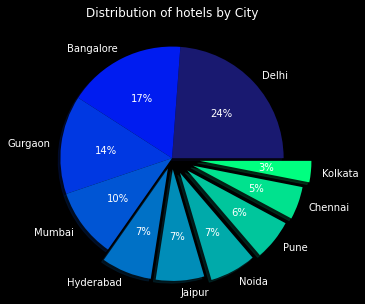

In [50]:
plt.figure(figsize=(5,5))
plt.title("Distribution of hotels by City")
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80']
plt.axis("equal")
g1=plt.pie(hotels_by_cities['%Distribution'],labels=hotels_by_cities['City'],colors=colors,autopct='%0.0f%%',
        shadow=True,explode=[0,0, 0, 0,0.1,0.1,0.15,0.175,0.2,0.25])

plt.show()

In [51]:
#More than half the hotels are concentrated in Delhi, Bangalore & Gurgaon

#2.Cancellation Rate

In [52]:
data.columns

Index(['booking_id', 'customer_id', 'status', 'check_in', 'check_out',
       'no_of_rooms', 'hotel_id', 'amount', 'discount', 'date_of_booking',
       'Unnamed: 10', 'Hotel_id', 'City'],
      dtype='object')

In [53]:
status_check=pd.DataFrame(data.groupby(['City','status']).count()['booking_id'])
status_check.reset_index(inplace=True)
status_check['Total']=status_check.groupby('City')['booking_id'].transform('sum')
status_check['Cancellation Rate']=((status_check['booking_id']/status_check['Total'])*100).round(1)
status_check['Labels']=status_check['Cancellation Rate'].astype(str) + '%'
status_check.head()

,City,status,booking_id,Total,Cancellation Rate,Labels
0,Bangalore,Cancelled,148,526,28.1,28.1%
1,Bangalore,No Show,15,526,2.9,2.9%
2,Bangalore,Stayed,363,526,69.0,69.0%
3,Chennai,Cancelled,29,98,29.6,29.6%
4,Chennai,No Show,3,98,3.1,3.1%


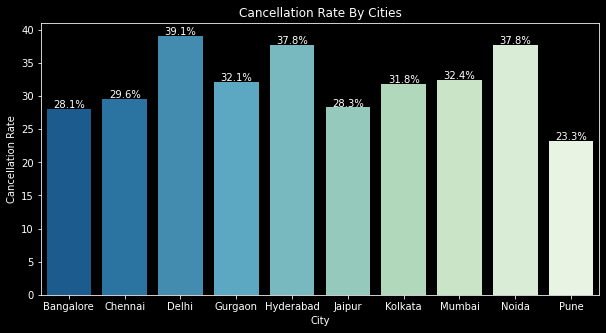

In [54]:
#Distribution on a bar plot
plt.figure(figsize=(10,5))
g2=sns.barplot(data=status_check[status_check['status']=='Cancelled'],x='City',y='Cancellation Rate',palette='GnBu_r')
g2.set(title='Cancellation Rate By Cities')

for a in g2.patches:
    g2.annotate('{:.1f}%'.format(a.get_height()),
              ((a.get_x()+a.get_width()/2),a.get_height()),
               ha="center", va="top",
               xytext=(0,9),
               textcoords="offset points")

In [55]:
#Delhi has the highest cancellation rate while Pune has the lowest

#3.Booking by Month

In [56]:

data['Month']=data['check_in'].apply(lambda x:x.split("-")[1])
data['Month']=data['Month'].map({'01':'Jan','02':'Feb','03':'Mar'})
data.head()
bookings_by_month=pd.DataFrame(data.groupby(['City','Month']).count()['booking_id']).reset_index()
bookings_by_month.head()

,City,Month,booking_id
0,Bangalore,Feb,149
1,Bangalore,Jan,155
2,Bangalore,Mar,194
3,Chennai,Feb,31
4,Chennai,Jan,38


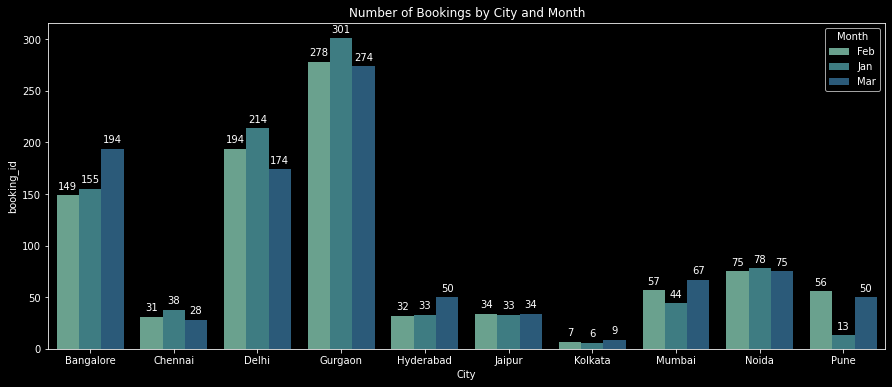

In [57]:
plt.figure(figsize=(15,6))
g3=sns.barplot(data=bookings_by_month,x='City',y='booking_id',palette='crest',hue='Month',dodge=True)
g3.set(title='Number of Bookings by City and Month')

for a in g3.patches:
    g3.annotate('{:.0f}'.format(a.get_height()),
              ((a.get_x()+a.get_width()/2),a.get_height()),
               ha="center", va="center",
               xytext=(0,9),
               textcoords="offset points")

#4.Revenue Distribution by Cities

In [58]:

data['Total Price']=data['amount']-data['discount']
data['Net Revenue']=data[data['status']!='Cancelled'].groupby(['City'])['Total Price'].transform('sum')
data['Gross Revenue']=data.groupby(['City'])['amount'].transform('sum')
Revenue=data[data['status']!='Cancelled'][['City','Net Revenue','Gross Revenue']].drop_duplicates()
Revenue=pd.melt(Revenue, id_vars="City", var_name="Revenue_Type", value_name="Revenue")

C:\Users\c301574\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1152x360 with 0 Axes>

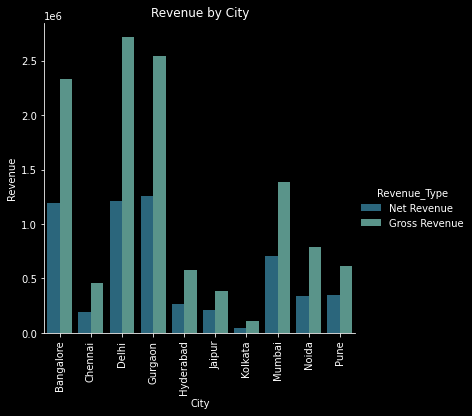

In [59]:
plt.figure(figsize=(16,5))
g4=sns.factorplot(data=Revenue,x='City',y='Revenue',palette='crest_r',hue='Revenue_Type',kind='bar',dodge=True)
g4.set(title='Revenue by City')
plt.xticks(rotation=90)
plt.show()